# **Predicting Water Quality**

# Importing Libraries

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [220]:
df = pd.read_csv('final dataset.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.427512,178.326555,25993.711410,7.294554,329.695223,566.754724,11.974270,60.736723,6.032995,0
1,NaN,196.248857,17909.365780,3.672271,NaN,417.287315,14.557068,57.734652,3.888235,0
2,6.109073,191.755571,26853.949490,9.064613,312.201984,375.547362,15.514033,73.789683,4.881101,0
3,5.842933,168.295287,19156.123130,6.878348,331.477649,506.756808,14.526151,80.423715,4.143225,0
4,5.367546,175.432819,29009.010820,6.481444,NaN,463.478425,19.370234,67.286208,4.267190,0
...,...,...,...,...,...,...,...,...,...,...
816,4.349440,157.513361,24352.066100,5.967722,287.045110,432.642307,10.667254,44.289013,4.442712,0
817,6.629985,195.700380,21495.537560,6.546464,363.691949,335.804710,11.395098,66.165224,2.534499,0
818,8.969697,195.744765,9049.682595,7.467068,396.453568,378.528511,17.757697,114.208671,3.983099,0
819,6.771050,194.635122,15719.493610,6.746344,339.001575,441.730391,22.891011,75.472825,3.244867,0


# Understanding the Data

In [154]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [155]:
df.shape

(821, 10)

In [156]:
df.size

8210

In [157]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [158]:
df.max()

ph                    12.246928
Hardness             263.036704
Solids             56867.859240
Chloramines           12.279374
Sulfate              455.451234
Conductivity         666.690618
Organic_carbon        23.952450
Trihalomethanes      120.030077
Turbidity              6.389161
Potability             1.000000
dtype: float64

In [159]:
df.min()

ph                    0.227499
Hardness            122.906991
Solids             2808.025756
Chloramines           1.683993
Sulfate             211.851592
Conductivity        210.319182
Organic_carbon        2.200000
Trihalomethanes       8.577013
Turbidity             1.496101
Potability            0.000000
dtype: float64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               691 non-null    float64
 1   Hardness         821 non-null    float64
 2   Solids           821 non-null    float64
 3   Chloramines      821 non-null    float64
 4   Sulfate          623 non-null    float64
 5   Conductivity     821 non-null    float64
 6   Organic_carbon   821 non-null    float64
 7   Trihalomethanes  779 non-null    float64
 8   Turbidity        821 non-null    float64
 9   Potability       821 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 64.3 KB


In [161]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,691.000000,821.000000,821.000000,821.000000,623.000000,821.000000,821.000000,779.000000,821.000000,821.000000
mean,7.050446,196.698378,21945.549198,7.064147,330.009738,428.286984,14.287650,66.925711,3.930192,0.389769
std,1.640616,23.182396,9230.564875,1.658502,36.654089,80.640213,3.242313,16.063144,0.795781,0.487995
min,0.227499,122.906991,2808.025756,1.683993,211.851592,210.319182,2.200000,8.577013,1.496101,0.000000
25%,5.918699,180.859091,15007.272680,5.959309,306.598798,367.389811,12.127254,56.612632,3.379147,0.000000
50%,7.016836,197.560283,20478.785960,7.075131,329.695223,422.293819,14.221757,66.678214,3.939011,0.000000
75%,8.148424,212.909132,27430.441730,8.193416,352.350734,481.955877,16.520496,77.916888,4.456104,1.000000
max,12.246928,263.036704,56867.859240,12.279374,455.451234,666.690618,23.952450,120.030077,6.389161,1.000000


In [162]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.184472,-0.297668,0.051448,0.055450,0.004902,0.088459,0.016507,-0.044038,0.046004
Hardness,0.184472,1.000000,-0.219528,0.319011,-0.087872,-0.048770,-0.008534,0.006810,-0.035530,-0.038646
Solids,-0.297668,-0.219528,1.000000,-0.170479,-0.174676,0.034439,0.048014,-0.058405,0.012986,0.007045
Chloramines,0.051448,0.319011,-0.170479,1.000000,0.179353,-0.068507,-0.006431,0.037425,-0.022724,-0.018031
Sulfate,0.055450,-0.087872,-0.174676,0.179353,1.000000,0.028328,0.026966,-0.047388,-0.049937,-0.058208
Conductivity,0.004902,-0.048770,0.034439,-0.068507,0.028328,1.000000,0.048907,-0.030433,0.017304,-0.025396
Organic_carbon,0.088459,-0.008534,0.048014,-0.006431,0.026966,0.048907,1.000000,-0.071079,0.003143,-0.027808
Trihalomethanes,0.016507,0.006810,-0.058405,0.037425,-0.047388,-0.030433,-0.071079,1.000000,-0.091080,0.044236
Turbidity,-0.044038,-0.035530,0.012986,-0.022724,-0.049937,0.017304,0.003143,-0.091080,1.000000,0.026785
Potability,0.046004,-0.038646,0.007045,-0.018031,-0.058208,-0.025396,-0.027808,0.044236,0.026785,1.000000


In [163]:
df.nunique()

ph                 691
Hardness           821
Solids             821
Chloramines        821
Sulfate            623
Conductivity       821
Organic_carbon     821
Trihalomethanes    779
Turbidity          821
Potability           2
dtype: int64

In [164]:
df.isnull().values.any()

True

In [221]:
#Checking the number of missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)

ph                 130
Hardness             0
Solids               0
Chloramines          0
Sulfate            198
Conductivity         0
Organic_carbon       0
Trihalomethanes     42
Turbidity            0
Potability           0
dtype: int64


# Exploratory Data Analysis / Visualization

<AxesSubplot:>

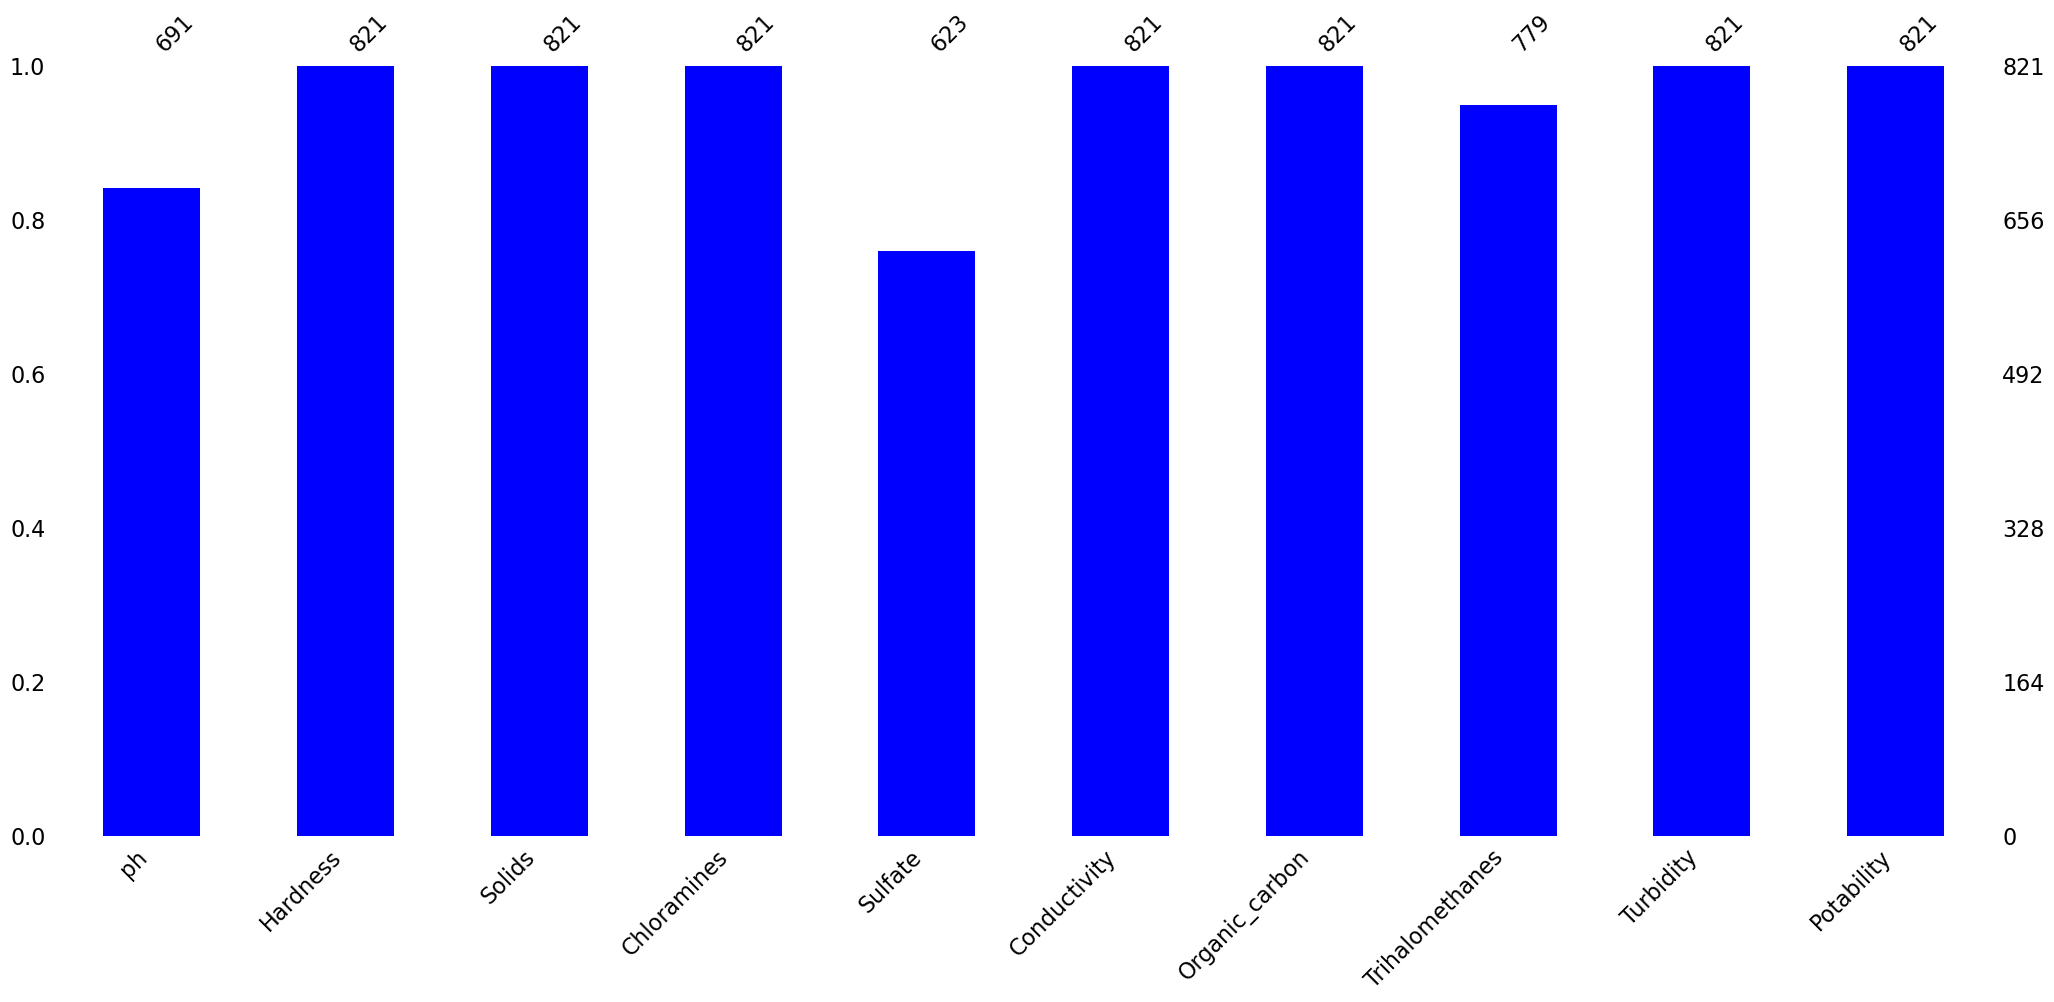

In [222]:
import missingno as no
no.bar(df, color='blue')

<AxesSubplot:>

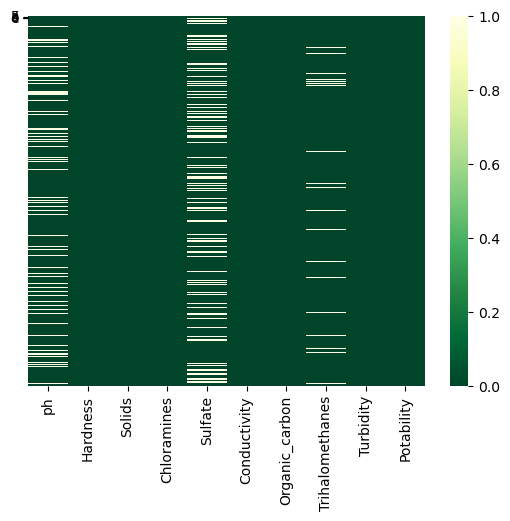

In [167]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlGn_r')

<AxesSubplot:ylabel='Potability'>

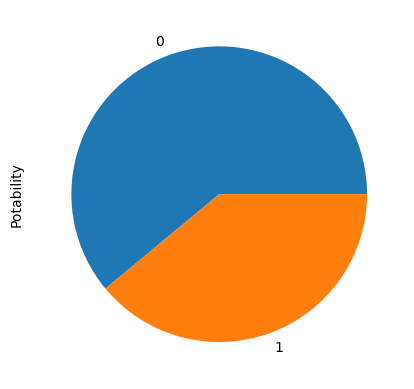

In [168]:
df.Potability.value_counts().plot(kind ='pie')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

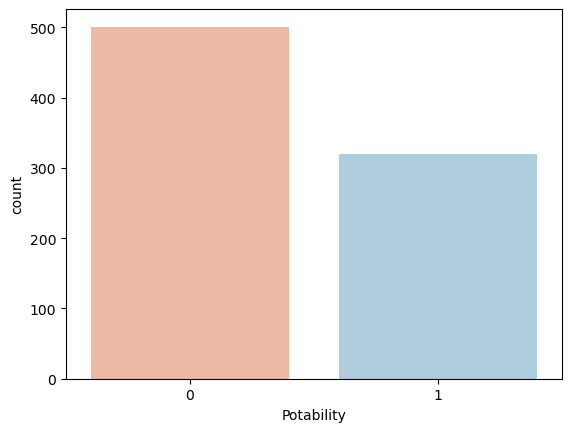

In [169]:
sns.countplot(df['Potability'], label='Count', palette='RdBu')

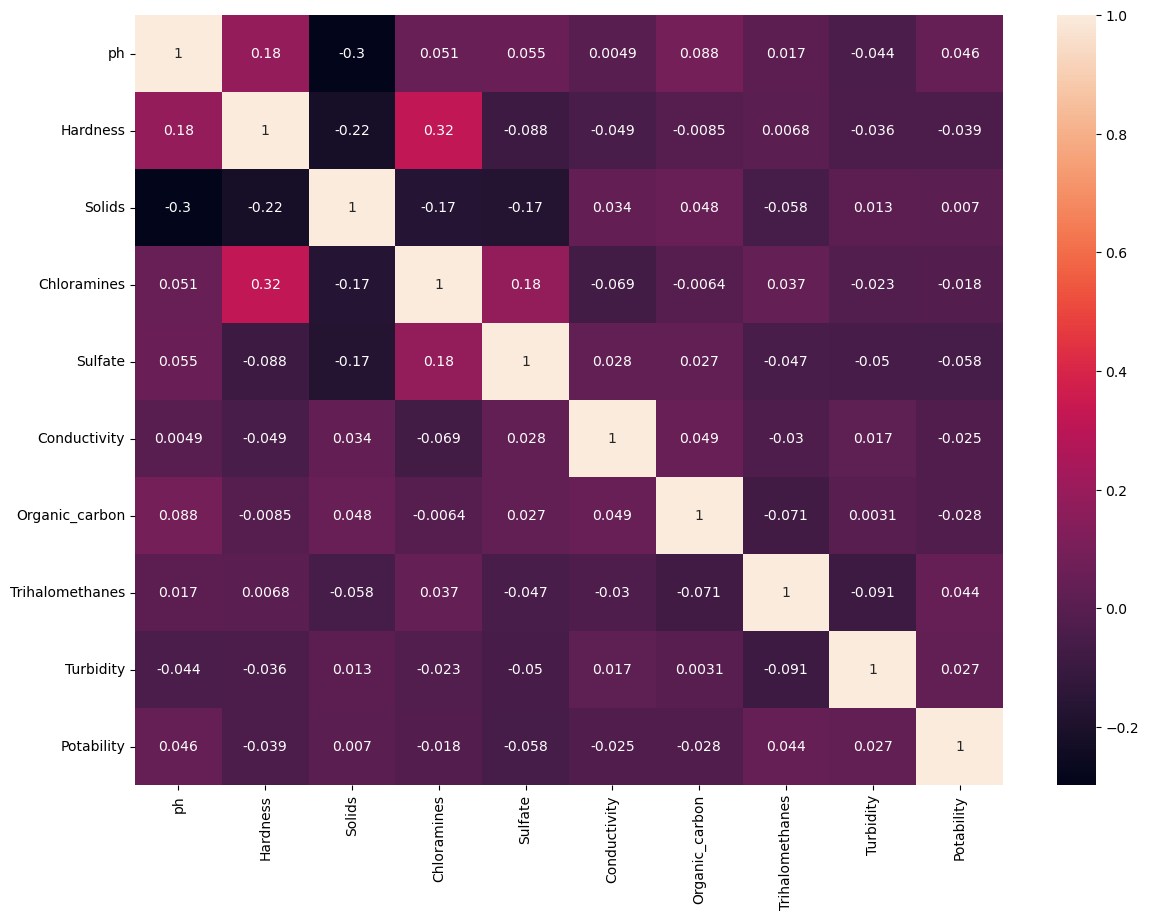

In [170]:
plt.figure(figsize=(14,10))
hm = sns.heatmap(df.corr(), annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph', ylabel='Hardness'>

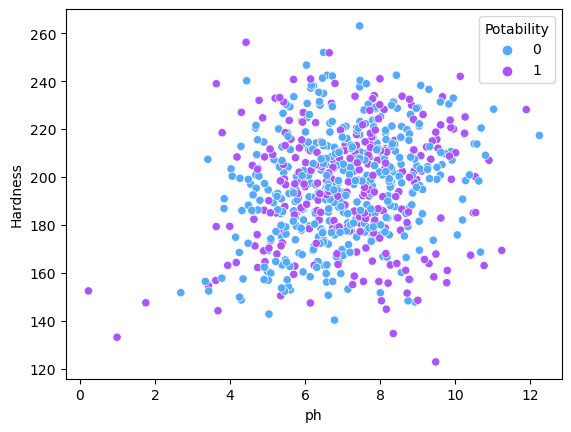

In [171]:
sns.scatterplot(df['ph'], df['Hardness'], hue=df.Potability, data=df, palette='cool')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

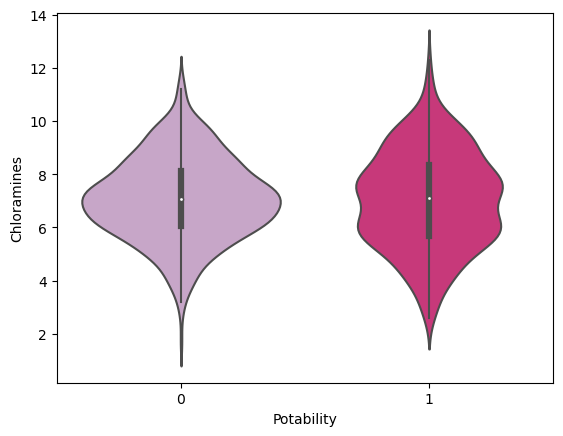

In [172]:
sns.violinplot(df["Potability"], df["Chloramines"], palette='PuRd')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

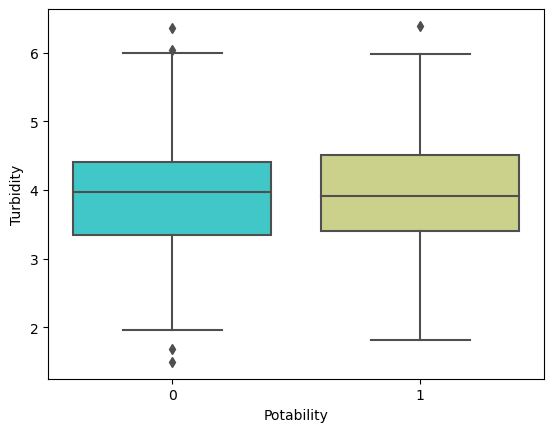

In [173]:
sns.boxplot(df['Potability'], df['Turbidity'], data=df, palette='rainbow')

# Missing Data Handling

In [174]:
# Filling the  missing values with the mean of their respective columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [223]:
# Verifying if there are any missing values left
print(df.isnull().sum())

ph                 130
Hardness             0
Solids               0
Chloramines          0
Sulfate            198
Conductivity         0
Organic_carbon       0
Trihalomethanes     42
Turbidity            0
Potability           0
dtype: int64


In [224]:

X = df.drop(['Potability'], axis=1)
y = df['Potability']

In [225]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Data into Dependent and Indpendent variables

In [226]:
#Data Preprocessing for Model Training
# x = df.drop(['Potability'], axis=1)
# y = df['Potability']

In [177]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [178]:
x.shape

(821, 9)

In [179]:
x[:5]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.427512,178.326555,25993.71141,7.294554,329.695223,566.754724,11.974270,60.736723,6.032995
1,7.050446,196.248857,17909.36578,3.672271,330.009738,417.287315,14.557068,57.734652,3.888235
2,6.109073,191.755571,26853.94949,9.064613,312.201984,375.547362,15.514033,73.789683,4.881101
3,5.842933,168.295287,19156.12313,6.878348,331.477649,506.756808,14.526151,80.423715,4.143225
4,5.367546,175.432819,29009.01082,6.481444,330.009738,463.478425,19.370234,67.286208,4.267190


In [180]:
y[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

# Training and Testing the Data

In [262]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [264]:
lm = LogisticRegression(random_state=5)
lm.fit(xtrain, ytrain)

LogisticRegression(random_state=5)

## Prediction

In [265]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)
print(ypred_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [266]:
df = pd.DataFrame(ypred_test, ytest)
df.head()

,0
Potability,
1,0
1,0
0,0
1,0
1,0


## Confusion Matrix

In [267]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [268]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[128,   1],
       [ 77,   0]], dtype=int64)

<AxesSubplot:>

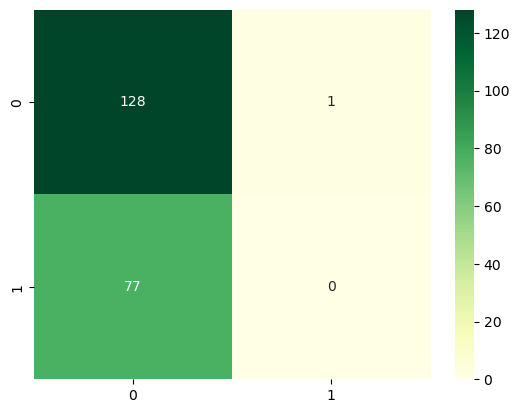

In [269]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

## Accuracy Score

In [270]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 60.8130081300813
Accuracy of testing data: 62.13592233009708


# Support Vector Machine

In [271]:
svc = SVC(C=10)
svc.fit(xtrain, ytrain)

SVC(C=10)

## Prediction

In [273]:
ypred_train = svc.predict(xtrain)
ypred_test = svc.predict(xtest)
# print(ypred_test)

## Confusion Matrix

In [275]:
cmt = np.array(confusion_matrix(ypred_test, ytest))
cmt

array([[129,  77],
       [  0,   0]], dtype=int64)

<AxesSubplot:>

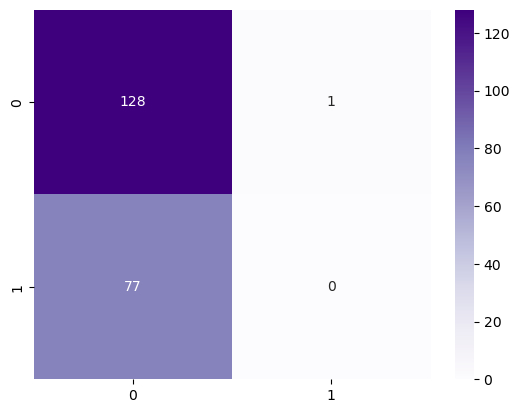

In [276]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

# Accuracy

In [277]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 60.48780487804878
Accuracy of testing data: 62.62135922330098


# Decission Tree

In [278]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

## Prediction

In [279]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [280]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[88, 27],
       [41, 50]], dtype=int64)

<AxesSubplot:>

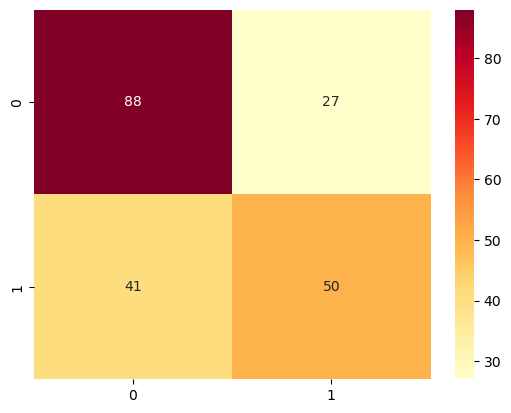

In [281]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Accuracy

In [282]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 66.99029126213593


# K Nearest Neighbor

In [283]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

## Prediction

In [284]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Confusion Matrix

In [285]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[112,  64],
       [ 17,  13]], dtype=int64)

<AxesSubplot:>

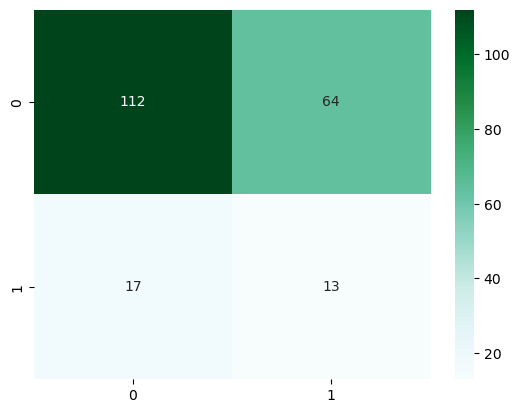

In [286]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuGn" ,fmt='g')

## Accuracy

In [287]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 71.869918699187
Accuracy of testing data: 60.679611650485434


# Naive Bayes

In [288]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

## Prediction

In [289]:
ypred_train = gnb.predict(xtrain)
ypred_test = gnb.predict(xtest)

## Confusion Matrix

In [290]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[106,  54],
       [ 23,  23]], dtype=int64)

<AxesSubplot:>

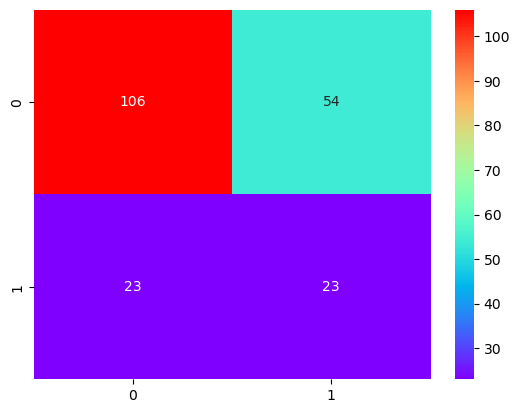

In [291]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="rainbow" ,fmt='g')

## Accuracy

In [292]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 67.64227642276423
Accuracy of testing data: 62.62135922330098


# Random Forest Classifier

In [293]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

## Prediction

In [295]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Mtrix

In [296]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[113,  33],
       [ 16,  44]], dtype=int64)

<AxesSubplot:>

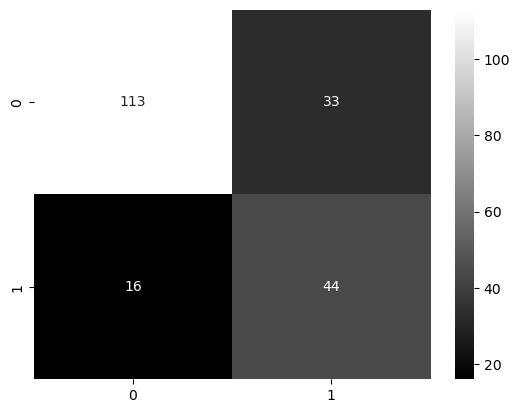

In [300]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="gray" ,fmt='g')

## Accuracy

In [301]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac6 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac6)

Accuracy of training data: 100.0
Accuracy of testing data: 76.2135922330097


# Comparing Accuracy of Different Models

In [302]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'Decission Tree', ac4:'KNN', ac5: 'Naive Bayes', ac6: 'Random Forest'}

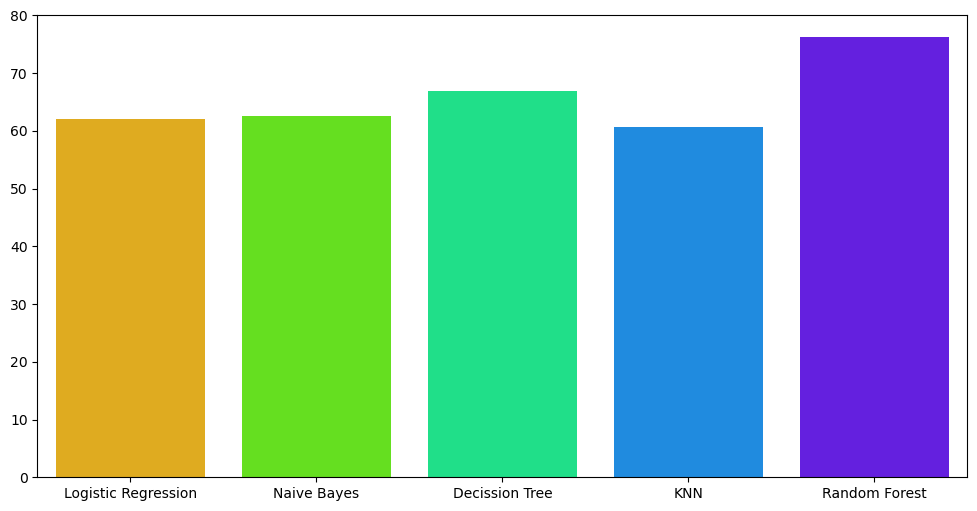

In [303]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

The model with highest Accuracy score is *Random Forest CLassifier* with an accuracy of **78.66**

In [311]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(xtrain, ytrain)
    print(model[0])
    print("Score: ", m.score(xtest,ytest))
    print("")

Linear Regression
Score:  -0.015067701943391354

KNN
Score:  0.5679611650485437

SVM
Score:  0.6262135922330098

Naive Bayes
Score:  0.6262135922330098

Decisiontree
Score:  0.6553398058252428



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


RandomForest
Score:  0.7330097087378641

LogisticRegression
Score:  0.6213592233009708



The model with highest Accuracy score is *RandomForestClassifier*
 with an accuracy of 78.66 and score of  0.73 